In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Dados da estação A420 - Carira SE. 
## 2012-2022, 11 Anos

## Ajustes dos dados

In [46]:
df = pd.read_csv('INMET_2012_2022/dados_A420_H_2012-01-01_2022-12-31.csv',delimiter=';', skiprows = range (0, 10))
df.columns = ['data','hora','p_atm_estacao','temp_po','temp_max_ant','temp_min_ant','temp_po_max_ant','temp_po_min_ant','ur_max_ant','ur_min_ant','ur_ar_horaria','e']

df.drop('e', axis=1, inplace=True)
#df = df.dropna() # Apaga as linhas com pelo menos um dado faltante
#df = df.interpolate(method="linear") # Caso queira fazer uma interpolação
df.shape

(96432, 11)

In [47]:
df['ano'] = df['data'].str[0:4] # cria a coluna ano com as strings 0, 1, 2 e 3 da coluna data
df['mes'] = df['data'].str[5:7] # cria a coluna mes com as strings 5 e 6 da coluna data
df.head(3)

,data,hora,p_atm_estacao,temp_po,temp_max_ant,temp_min_ant,temp_po_max_ant,temp_po_min_ant,ur_max_ant,ur_min_ant,ur_ar_horaria,ano,mes
0,2012-01-01,0,979.8,19.9,25.1,24.1,19.9,19.3,77.0,70.0,77.0,2012,01
1,2012-01-01,100,979.6,20.3,24.1,23.5,20.3,19.9,82.0,77.0,82.0,2012,01
2,2012-01-01,200,979.3,21.3,23.5,23.1,21.3,20.3,89.0,82.0,89.0,2012,01


In [48]:
meses = {
    '01': 'jan',#eiro',#
    '02': 'fev',#ereiro',
    '03': 'mar',#ço',
    '04': 'abr',#il',
    '05': 'mai',#o',
    '06': 'jun',#ho',
    '07': 'jul',#ho',
    '08': 'ago',#sto',
    '09': 'set',#embro',
    '10': 'out',#ubro',
    '11': 'nov',#embro',
    '12': 'dez',#embro',
} # dicionário chave:valor
df['mes'] = df['mes'].replace(meses) # a coluna mes fica igual à propria coluna mundando 
#seus valores de acordo com o dicionário
df.head(3)

,data,hora,p_atm_estacao,temp_po,temp_max_ant,temp_min_ant,temp_po_max_ant,temp_po_min_ant,ur_max_ant,ur_min_ant,ur_ar_horaria,ano,mes
0,2012-01-01,0,979.8,19.9,25.1,24.1,19.9,19.3,77.0,70.0,77.0,2012,jan
1,2012-01-01,100,979.6,20.3,24.1,23.5,20.3,19.9,82.0,77.0,82.0,2012,jan
2,2012-01-01,200,979.3,21.3,23.5,23.1,21.3,20.3,89.0,82.0,89.0,2012,jan


In [49]:
#dia = [700,800,900,1000,1100,1200,1300,1400,1500,1600,1700,1800]
#noite = [0,100,200,300,400,500,600,1900,2000,2100,2200,2300]

df['turno'] = df['hora'] # cria a coluna turno com os mesmos dados da coluna hora
turnos = {0:'noite',100:'noite',200:'noite',300:'noite',400:'noite',500:'noite',600:'noite',
          1900:'noite',2000:'noite',2100:'noite',2200:'noite',2300:'noite',
          700:'dia',800:'dia',900:'dia',1000:'dia',1100:'dia',1200:'dia',
          1300:'dia',1400:'dia',1500:'dia',1600:'dia',1700:'dia',1800:'dia'    
} # dicionário chave:valor
df['turno'] = df['turno'].replace(turnos) # a coluna mes fica igual à propria coluna mundando 
#seus valores de acordo com o dicionário
df['temp_med_ant'] = (df['temp_max_ant'] + df['temp_min_ant'])/2 # Cria uma coluna com a media 
#de duas já existente
df.head(3)

,data,hora,p_atm_estacao,temp_po,temp_max_ant,temp_min_ant,temp_po_max_ant,temp_po_min_ant,ur_max_ant,ur_min_ant,ur_ar_horaria,ano,mes,turno,temp_med_ant
0,2012-01-01,0,979.8,19.9,25.1,24.1,19.9,19.3,77.0,70.0,77.0,2012,jan,noite,24.6
1,2012-01-01,100,979.6,20.3,24.1,23.5,20.3,19.9,82.0,77.0,82.0,2012,jan,noite,23.8
2,2012-01-01,200,979.3,21.3,23.5,23.1,21.3,20.3,89.0,82.0,89.0,2012,jan,noite,23.3


In [50]:
df_dia = df.loc[df['turno']=='dia']
df_noite = df.loc[df['turno']=='noite']

In [51]:
print(df.shape, df_dia.shape, df_noite.shape)

(96432, 15) (48216, 15) (48216, 15)


In [52]:
meses_inv = {
    'jan': 1,#eiro',#
    'fev': 2,#ereiro',
    'mar': 3,#ço',
    'abr': 4,#il',
    'mai': 5,#o',
    'jun': 6,#ho',
    'jul': 7,#ho',
    'ago': 8,#sto',
    'set': 9,#embro',
    'out': 10,#ubro',
    'nov': 11,#embro',
    'dez': 12,#embro',
}

#['jan', 'fev', 'mar', 'abr', 'mai', 'jun', 'jul', 'ago', 'set', 'out', 'nov', 'dez']

## Resumos estatístico - Período 2012 a 2022

### Geral

In [53]:
resumo_geral = df[['p_atm_estacao','temp_po','temp_max_ant','temp_min_ant',
    'temp_po_max_ant','temp_po_min_ant','ur_max_ant',
    'ur_min_ant','ur_ar_horaria']].describe().T # Resumo estatístico
resumo_geral#.to_excel('resumo_geral.xlsx', index=True) # Retirar o primeiro comentário para criar um aquivo em formato .xlsx

,count,mean,std,min,25%,50%,75%,max
p_atm_estacao,73937.0,981.448551,2.646485,971.7,979.6,981.3,983.3,989.4
temp_po,68312.0,19.748813,2.135728,-7.1,18.5,20.0,21.2,30.9
temp_max_ant,73905.0,25.376624,4.389908,15.2,22.1,24.4,28.4,40.0
temp_min_ant,73905.0,24.053857,3.775318,14.0,21.3,23.4,26.3,38.8
temp_po_max_ant,68084.0,20.261166,2.032477,10.4,19.1,20.4,21.6,33.2
temp_po_min_ant,68084.0,19.229665,2.258355,7.4,17.9,19.5,20.8,29.9
ur_max_ant,68112.0,79.377070,18.814280,19.0,66.0,86.0,95.0,100.0
ur_min_ant,68112.0,73.477713,21.130650,16.0,56.0,79.0,92.0,100.0
ur_ar_horaria,68312.0,76.534269,20.055173,12.0,61.0,83.0,94.0,100.0


### Dia 7:00 às 18:00

In [54]:
resumo_dia = df_dia[['p_atm_estacao','temp_po','temp_max_ant','temp_min_ant',
        'temp_po_max_ant','temp_po_min_ant','ur_max_ant',
        'ur_min_ant','ur_ar_horaria']].describe().T
resumo_dia#.to_excel('resumo_dia.xlsx', index=True) # Retirar o primeiro comentário para criar um aquivo em formato .xlsx

,count,mean,std,min,25%,50%,75%,max
p_atm_estacao,36993.0,981.592063,2.640993,972.1,979.8,981.5,983.4,989.4
temp_po,34055.0,19.504936,2.421392,-7.1,18.0,19.8,21.2,30.9
temp_max_ant,36964.0,26.594054,4.686047,15.2,22.7,26.3,30.4,40.0
temp_min_ant,36964.0,24.849178,4.140044,14.0,21.7,24.2,28.1,38.8
temp_po_max_ant,33735.0,20.307894,2.290514,10.4,18.9,20.5,21.9,33.2
temp_po_min_ant,33735.0,18.879976,2.466006,8.2,17.3,19.2,20.6,29.9
ur_max_ant,33751.0,75.581435,21.199781,19.0,57.0,82.0,95.0,100.0
ur_min_ant,33751.0,68.148144,22.796458,16.0,47.0,68.0,91.0,100.0
ur_ar_horaria,34055.0,70.321392,22.174402,12.0,50.0,71.0,93.0,100.0


### Noite 19:00 às 6:00

In [55]:
resumo_noite = df_noite[['p_atm_estacao','temp_po','temp_max_ant','temp_min_ant',
          'temp_po_max_ant','temp_po_min_ant','ur_max_ant',
          'ur_min_ant','ur_ar_horaria']].describe().T
resumo_noite#.to_excel('resumo_noite.xlsx', index=True) # Retirar o primeiro comentário para criar um aquivo em formato .xlsx

,count,mean,std,min,25%,50%,75%,max
p_atm_estacao,36944.0,981.304848,2.644215,971.7,979.4,981.1,983.2,989.0
temp_po,34257.0,19.991251,1.774664,9.6,18.9,20.1,21.2,28.8
temp_max_ant,36941.0,24.158436,3.689887,15.9,21.6,23.5,25.8,39.5
temp_min_ant,36941.0,23.258041,3.177796,14.9,21.0,23.0,24.8,38.0
temp_po_max_ant,34349.0,20.215273,1.741057,10.6,19.1,20.3,21.4,30.3
temp_po_min_ant,34349.0,19.573103,1.974533,7.4,18.4,19.7,20.9,28.5
ur_max_ant,34361.0,83.105323,15.237346,19.0,75.0,88.0,95.0,100.0
ur_min_ant,34361.0,78.712668,17.869973,16.0,68.0,85.0,93.0,100.0
ur_ar_horaria,34257.0,82.710512,15.386189,18.0,75.0,88.0,94.0,100.0


## Gráficos

In [56]:
df.columns

Index(['data', 'hora', 'p_atm_estacao', 'temp_po', 'temp_max_ant',
       'temp_min_ant', 'temp_po_max_ant', 'temp_po_min_ant', 'ur_max_ant',
       'ur_min_ant', 'ur_ar_horaria', 'ano', 'mes', 'turno', 'temp_med_ant'],
      dtype='object')

### Histogramas 

#### Umidade Relativa

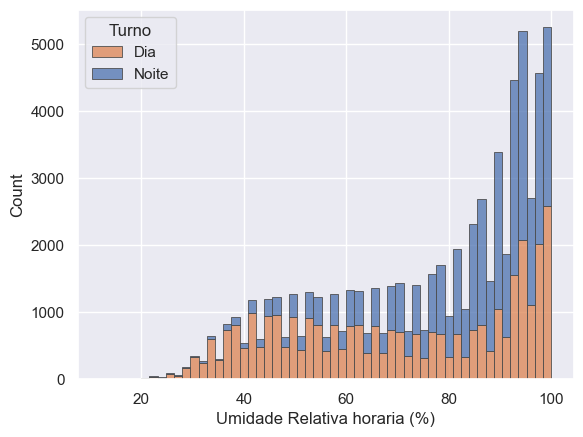

In [57]:
sns.histplot(df, x='ur_ar_horaria', hue='turno', multiple="stack", edgecolor=".3")
plt.xlabel('Umidade Relativa horaria (%)')
plt.legend(['Dia', 'Noite'], title='Turno');

#### Temperatura

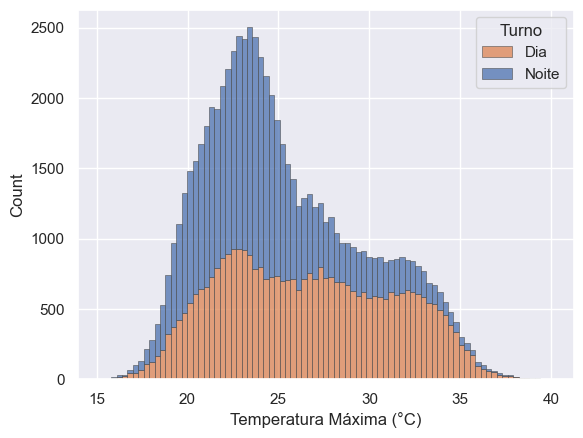

In [58]:
sns.histplot(df, x='temp_max_ant', hue='turno', multiple="stack", edgecolor=".3")
plt.xlabel('Temperatura Máxima (°C)')
plt.legend(['Dia', 'Noite'], title='Turno');

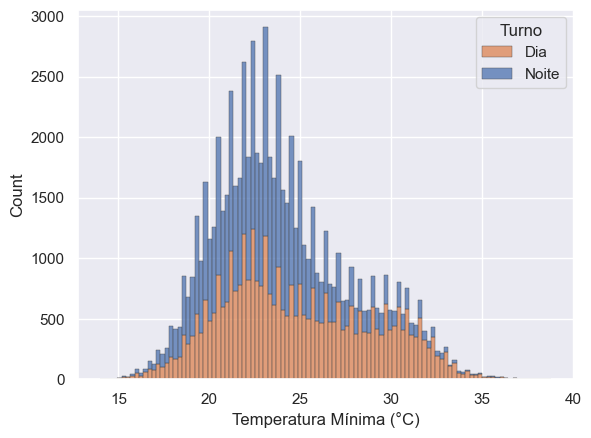

In [59]:
sns.histplot(df, x='temp_min_ant', hue='turno', multiple="stack", edgecolor=".3")
plt.xlabel('Temperatura Mínima (°C)')
plt.legend(['Dia', 'Noite'], title='Turno');

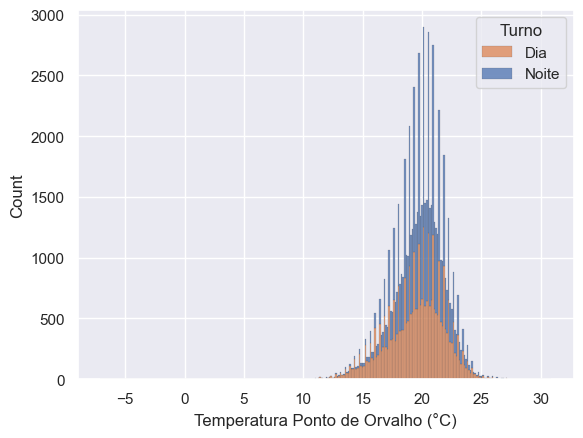

In [60]:
sns.histplot(df, x='temp_po', hue='turno', multiple="stack", edgecolor=".3")
plt.xlabel('Temperatura Ponto de Orvalho (°C)')
plt.legend(['Dia', 'Noite'], title='Turno');

### Boxplot

#### Umidade

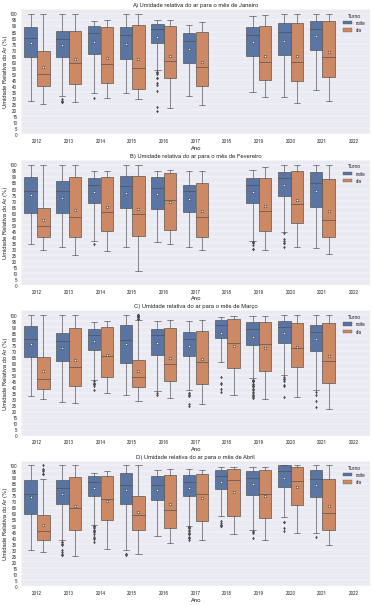

In [61]:
plt.figure(figsize=(15,25),dpi=30)


plt.subplot(4,1,1)
sns.boxplot(y='ur_ar_horaria', x='ano',
            hue='turno',
            showmeans=True,
            meanprops={'marker':'o',
                       'markerfacecolor':'white',
                       'markeredgecolor':'black',
                       'markersize':'6'},
            data=df[df['mes']=='jan'])
plt.title('A) Umidade relativa do ar para o mês de Janeiro', size=14);
plt.ylabel('Umidade Relativa do Ar (%)', size=14)
plt.xlabel('Ano', size=14)
plt.legend(title='Turno',frameon=False)
plt.yticks(np.arange(0, 101, 5))
#############################################################

plt.subplot(4,1,2)
sns.boxplot(y='ur_ar_horaria', x='ano',
            hue='turno',
            showmeans=True,
            meanprops={'marker':'o',
                       'markerfacecolor':'white',
                       'markeredgecolor':'black',
                       'markersize':'6'},
            data=df[df['mes']=='fev'])
plt.title('B) Umidade relativa do ar para o mês de Fevereiro', size=14);
plt.ylabel('Umidade Relativa do Ar (%)', size=14)
plt.xlabel('Ano', size=14)
plt.legend(title='Turno',frameon=False)
plt.yticks(np.arange(0, 101, 5))
#############################################################

plt.subplot(4,1,3)
sns.boxplot(y='ur_ar_horaria', x='ano',
            hue='turno',
            showmeans=True,
            meanprops={'marker':'o',
                       'markerfacecolor':'white',
                       'markeredgecolor':'black',
                       'markersize':'6'},
            data=df[df['mes']=='mar'])
plt.title('C) Umidade relativa do ar para o mês de Março', size=14);
plt.ylabel('Umidade Relativa do Ar (%)', size=14)
plt.xlabel('Ano', size=14)
plt.legend(title='Turno',frameon=False)
plt.yticks(np.arange(0, 101, 5))
#############################################################

plt.subplot(4,1,4)
sns.boxplot(y='ur_ar_horaria', x='ano',
            hue='turno',
            showmeans=True,
            meanprops={'marker':'o',
                       'markerfacecolor':'white',
                       'markeredgecolor':'black',
                       'markersize':'6'},
            data=df[df['mes']=='abr'])
plt.title('D) Umidade relativa do ar para o mês de Abril', size=14);
plt.ylabel('Umidade Relativa do Ar (%)', size=14)
plt.xlabel('Ano', size=14)
plt.legend(title='Turno',frameon=False)
plt.yticks(np.arange(0, 101, 5));
#############################################################

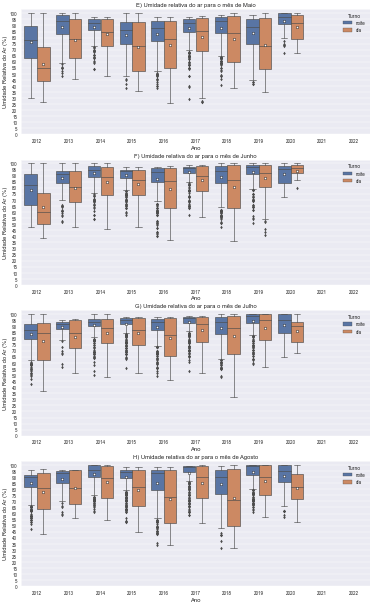

In [62]:
plt.figure(figsize=(15,25),dpi=30)


plt.subplot(4,1,1)
sns.boxplot(y='ur_ar_horaria', x='ano',
            hue='turno',
            showmeans=True,
            meanprops={'marker':'o',
                       'markerfacecolor':'white',
                       'markeredgecolor':'black',
                       'markersize':'6'},
            data=df[df['mes']=='mai'])
plt.title('E) Umidade relativa do ar para o mês de Maio', size=14);
plt.ylabel('Umidade Relativa do Ar (%)', size=14)
plt.xlabel('Ano', size=14)
plt.legend(title='Turno',frameon=False)
plt.yticks(np.arange(0, 101, 5))
#############################################################

plt.subplot(4,1,2)
sns.boxplot(y='ur_ar_horaria', x='ano',
            hue='turno',
            showmeans=True,
            meanprops={'marker':'o',
                       'markerfacecolor':'white',
                       'markeredgecolor':'black',
                       'markersize':'6'},
            data=df[df['mes']=='jun'])
plt.title('F) Umidade relativa do ar para o mês de Junho', size=14);
plt.ylabel('Umidade Relativa do Ar (%)', size=14)
plt.xlabel('Ano', size=14)
plt.legend(title='Turno',frameon=False)
plt.yticks(np.arange(0, 101, 5))
#############################################################

plt.subplot(4,1,3)
sns.boxplot(y='ur_ar_horaria', x='ano',
            hue='turno',
            showmeans=True,
            meanprops={'marker':'o',
                       'markerfacecolor':'white',
                       'markeredgecolor':'black',
                       'markersize':'6'},
            data=df[df['mes']=='jul'])
plt.title('G) Umidade relativa do ar para o mês de Julho', size=14);
plt.ylabel('Umidade Relativa do Ar (%)', size=14)
plt.xlabel('Ano', size=14)
plt.legend(title='Turno',frameon=False)
plt.yticks(np.arange(0, 101, 5))
#############################################################

plt.subplot(4,1,4)
sns.boxplot(y='ur_ar_horaria', x='ano',
            hue='turno',
            showmeans=True,
            meanprops={'marker':'o',
                       'markerfacecolor':'white',
                       'markeredgecolor':'black',
                       'markersize':'6'},
            data=df[df['mes']=='ago'])
plt.title('H) Umidade relativa do ar para o mês de Agosto', size=14);
plt.ylabel('Umidade Relativa do Ar (%)', size=14)
plt.xlabel('Ano', size=14)
plt.legend(title='Turno',frameon=False)
plt.yticks(np.arange(0, 101, 5));
#############################################################

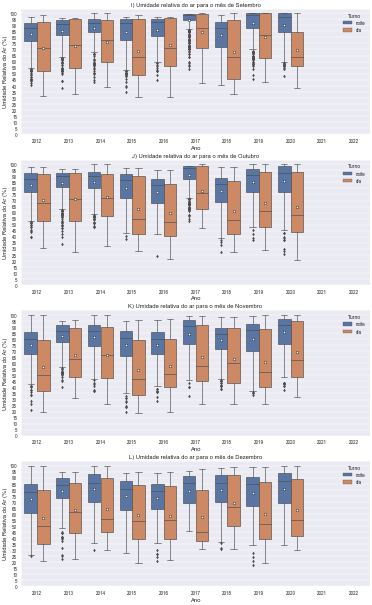

In [63]:
plt.figure(figsize=(15,25),dpi=30)


plt.subplot(4,1,1)
sns.boxplot(y='ur_ar_horaria', x='ano',
            hue='turno',
            showmeans=True,
            meanprops={'marker':'o',
                       'markerfacecolor':'white',
                       'markeredgecolor':'black',
                       'markersize':'6'},
            data=df[df['mes']=='set'])
plt.title('I) Umidade relativa do ar para o mês de Setembro', size=14);
plt.ylabel('Umidade Relativa do Ar (%)', size=14)
plt.xlabel('Ano', size=14)
plt.legend(title='Turno',frameon=False)
plt.yticks(np.arange(0, 101, 5))
#############################################################

plt.subplot(4,1,2)
sns.boxplot(y='ur_ar_horaria', x='ano',
            hue='turno',
            showmeans=True,
            meanprops={'marker':'o',
                       'markerfacecolor':'white',
                       'markeredgecolor':'black',
                       'markersize':'6'},
            data=df[df['mes']=='out'])
plt.title('J) Umidade relativa do ar para o mês de Outubro', size=14);
plt.ylabel('Umidade Relativa do Ar (%)', size=14)
plt.xlabel('Ano', size=14)
plt.legend(title='Turno',frameon=False)
plt.yticks(np.arange(0, 101, 5))
#############################################################

plt.subplot(4,1,3)
sns.boxplot(y='ur_ar_horaria', x='ano',
            hue='turno',
            showmeans=True,
            meanprops={'marker':'o',
                       'markerfacecolor':'white',
                       'markeredgecolor':'black',
                       'markersize':'6'},
            data=df[df['mes']=='nov'])
plt.title('K) Umidade relativa do ar para o mês de Novembro', size=14);
plt.ylabel('Umidade Relativa do Ar (%)', size=14)
plt.xlabel('Ano', size=14)
plt.legend(title='Turno',frameon=False)
plt.yticks(np.arange(0, 101, 5))
#############################################################

plt.subplot(4,1,4)
sns.boxplot(y='ur_ar_horaria', x='ano',
            hue='turno',
            showmeans=True,
            meanprops={'marker':'o',
                       'markerfacecolor':'white',
                       'markeredgecolor':'black',
                       'markersize':'6'},
            data=df[df['mes']=='dez'])
plt.title('L) Umidade relativa do ar para o mês de Dezembro', size=14);
plt.ylabel('Umidade Relativa do Ar (%)', size=14)
plt.xlabel('Ano', size=14)
plt.legend(title='Turno',frameon=False)
plt.yticks(np.arange(0, 101, 5));
#############################################################

#### Temperatura

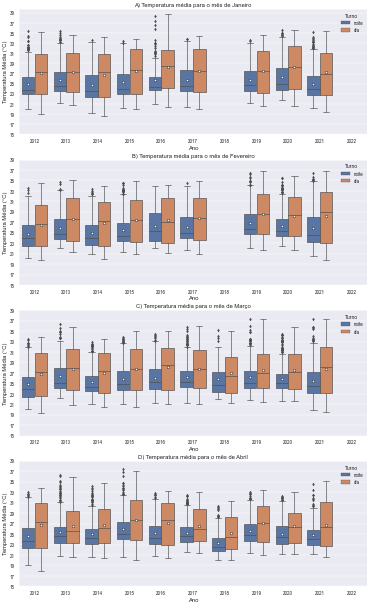

In [64]:
plt.figure(figsize=(15,25),dpi=30)

#########################################################
plt.subplot(4,1,1)
sns.boxplot(y='temp_med_ant', x='ano',
            hue='turno',
            showmeans=True,
            meanprops={'marker':'o',
                       'markerfacecolor':'white',
                       'markeredgecolor':'black',
                       'markersize':'6'},
            data=df[df['mes']=='jan'])
plt.title('A) Temperatura média para o mês de Janeiro', size=14);
plt.ylabel('Temperatura Média (°C)', size=14)
plt.xlabel('Ano', size=14)
plt.legend(title='Turno',frameon=False)
plt.yticks(np.arange(15, 41, 2))
#########################################################
plt.subplot(4,1,2)
sns.boxplot(y='temp_med_ant', x='ano',
            hue='turno',
            showmeans=True,
            meanprops={'marker':'o',
                       'markerfacecolor':'white',
                       'markeredgecolor':'black',
                       'markersize':'6'},
            data=df[df['mes']=='fev'])
plt.title('B) Temperatura média para o mês de Fevereiro', size=14);
plt.ylabel('Temperatura Média (°C)', size=14)
plt.xlabel('Ano', size=14)
plt.legend(title='Turno',frameon=False)
plt.yticks(np.arange(15, 41, 2))
#########################################################
plt.subplot(4,1,3)
sns.boxplot(y='temp_med_ant', x='ano',
            hue='turno',
            showmeans=True,
            meanprops={'marker':'o',
                       'markerfacecolor':'white',
                       'markeredgecolor':'black',
                       'markersize':'6'},
            data=df[df['mes']=='mar'])
plt.title('C) Temperatura média para o mês de Março', size=14);
plt.ylabel('Temperatura Média (°C)', size=14)
plt.xlabel('Ano', size=14)
plt.legend(title='Turno',frameon=False)
plt.yticks(np.arange(15, 41, 2))
#########################################################
plt.subplot(4,1,4)
sns.boxplot(y='temp_med_ant', x='ano',
            hue='turno',
            showmeans=True,
            meanprops={'marker':'o',
                       'markerfacecolor':'white',
                       'markeredgecolor':'black',
                       'markersize':'6'},
            data=df[df['mes']=='abr'])
plt.title('D) Temperatura média para o mês de Abril', size=14);
plt.ylabel('Temperatura Média (°C)', size=14)
plt.xlabel('Ano', size=14)
plt.legend(title='Turno',frameon=False)
plt.yticks(np.arange(15, 41, 2));

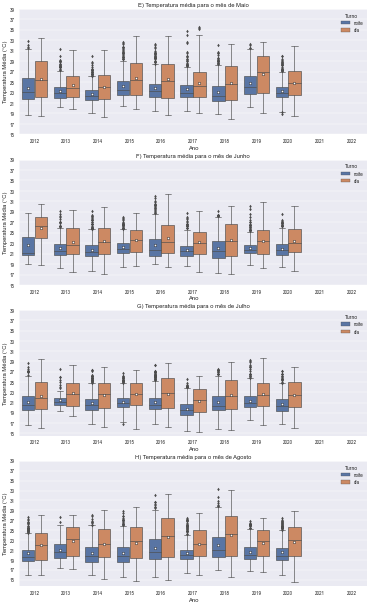

In [65]:
plt.figure(figsize=(15,25),dpi=30)

#########################################################
plt.subplot(4,1,1)
sns.boxplot(y='temp_med_ant', x='ano',
            hue='turno',
            showmeans=True,
            meanprops={'marker':'o',
                       'markerfacecolor':'white',
                       'markeredgecolor':'black',
                       'markersize':'6'},
            data=df[df['mes']=='mai'])
plt.title('E) Temperatura média para o mês de Maio', size=14);
plt.ylabel('Temperatura Média (°C)', size=14)
plt.xlabel('Ano', size=14)
plt.legend(title='Turno',frameon=False)
plt.yticks(np.arange(15, 41, 2))
#########################################################
plt.subplot(4,1,2)
sns.boxplot(y='temp_med_ant', x='ano',
            hue='turno',
            showmeans=True,
            meanprops={'marker':'o',
                       'markerfacecolor':'white',
                       'markeredgecolor':'black',
                       'markersize':'6'},
            data=df[df['mes']=='jun'])
plt.title('F) Temperatura média para o mês de Junho', size=14);
plt.ylabel('Temperatura Média (°C)', size=14)
plt.xlabel('Ano', size=14)
plt.legend(title='Turno',frameon=False)
plt.yticks(np.arange(15, 41, 2))
#########################################################
plt.subplot(4,1,3)
sns.boxplot(y='temp_med_ant', x='ano',
            hue='turno',
            showmeans=True,
            meanprops={'marker':'o',
                       'markerfacecolor':'white',
                       'markeredgecolor':'black',
                       'markersize':'6'},
            data=df[df['mes']=='jul'])
plt.title('G) Temperatura média para o mês de Julho', size=14);
plt.ylabel('Temperatura Média (°C)', size=14)
plt.xlabel('Ano', size=14)
plt.legend(title='Turno',frameon=False)
plt.yticks(np.arange(15, 41, 2))
#########################################################
plt.subplot(4,1,4)
sns.boxplot(y='temp_med_ant', x='ano',
            hue='turno',
            showmeans=True,
            meanprops={'marker':'o',
                       'markerfacecolor':'white',
                       'markeredgecolor':'black',
                       'markersize':'6'},
            data=df[df['mes']=='ago'])
plt.title('H) Temperatura média para o mês de Agosto', size=14);
plt.ylabel('Temperatura Média (°C)', size=14)
plt.xlabel('Ano', size=14)
plt.legend(title='Turno',frameon=False)
plt.yticks(np.arange(15, 41, 2));

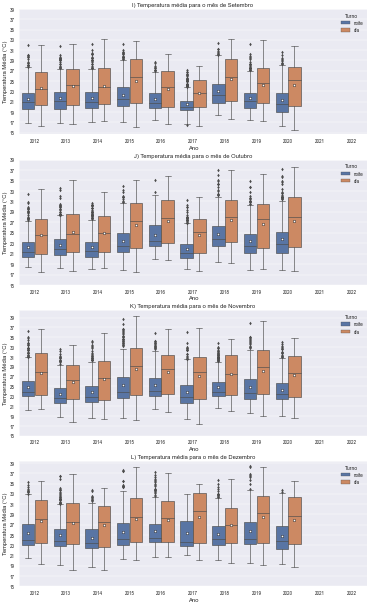

In [66]:
plt.figure(figsize=(15,25),dpi=30)

#########################################################
plt.subplot(4,1,1)
sns.boxplot(y='temp_med_ant', x='ano',
            hue='turno',
            showmeans=True,
            meanprops={'marker':'o',
                       'markerfacecolor':'white',
                       'markeredgecolor':'black',
                       'markersize':'6'},
            data=df[df['mes']=='set'])
plt.title('I) Temperatura média para o mês de Setembro', size=14);
plt.ylabel('Temperatura Média (°C)', size=14)
plt.xlabel('Ano', size=14)
plt.legend(title='Turno',frameon=False)
plt.yticks(np.arange(15, 41, 2))
#########################################################
plt.subplot(4,1,2)
sns.boxplot(y='temp_med_ant', x='ano',
            hue='turno',
            showmeans=True,
            meanprops={'marker':'o',
                       'markerfacecolor':'white',
                       'markeredgecolor':'black',
                       'markersize':'6'},
            data=df[df['mes']=='out'])
plt.title('J) Temperatura média para o mês de Outubro', size=14);
plt.ylabel('Temperatura Média (°C)', size=14)
plt.xlabel('Ano', size=14)
plt.legend(title='Turno',frameon=False)
plt.yticks(np.arange(15, 41, 2))
#########################################################
plt.subplot(4,1,3)
sns.boxplot(y='temp_med_ant', x='ano',
            hue='turno',
            showmeans=True,
            meanprops={'marker':'o',
                       'markerfacecolor':'white',
                       'markeredgecolor':'black',
                       'markersize':'6'},
            data=df[df['mes']=='nov'])
plt.title('K) Temperatura média para o mês de Novembro', size=14);
plt.ylabel('Temperatura Média (°C)', size=14)
plt.xlabel('Ano', size=14)
plt.legend(title='Turno',frameon=False)
plt.yticks(np.arange(15, 41, 2))
#########################################################
plt.subplot(4,1,4)
sns.boxplot(y='temp_med_ant', x='ano',
            hue='turno',
            showmeans=True,
            meanprops={'marker':'o',
                       'markerfacecolor':'white',
                       'markeredgecolor':'black',
                       'markersize':'6'},
            data=df[df['mes']=='dez'])
plt.title('L) Temperatura média para o mês de Dezembro', size=14);
plt.ylabel('Temperatura Média (°C)', size=14)
plt.xlabel('Ano', size=14)
plt.legend(title='Turno',frameon=False)
plt.yticks(np.arange(15, 41, 2));

## Ajuste da Umidade Relativa por ano e mês 

## Gráficos

In [67]:
df.columns

Index(['data', 'hora', 'p_atm_estacao', 'temp_po', 'temp_max_ant',
       'temp_min_ant', 'temp_po_max_ant', 'temp_po_min_ant', 'ur_max_ant',
       'ur_min_ant', 'ur_ar_horaria', 'ano', 'mes', 'turno', 'temp_med_ant'],
      dtype='object')

### Umidade Relativa

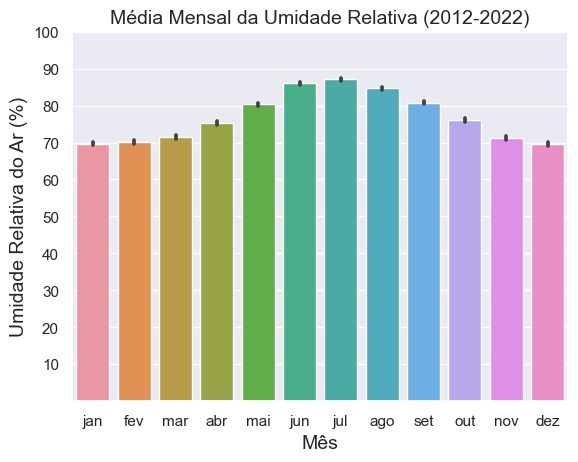

In [68]:
sns.barplot(data=df,x='mes',y='ur_ar_horaria')
plt.title('Média Mensal da Umidade Relativa (2012-2022)', size=14);
plt.ylabel('Umidade Relativa do Ar (%)', size=14)
plt.xlabel('Mês', size=14)

plt.yticks(np.arange(10, 101, 10));

In [69]:
turno = pd.DataFrame()
turno = df.groupby(['mes','turno'])['ur_ar_horaria'].mean()#.unstack() # Média por ano por mês

# Procedimento para organizar os dados em ordem crescente, jan a dez
turno_df = turno.to_frame()
turno_df = turno_df.assign(idx=turno_df.index)
turno_df = turno_df.reset_index()
turno_df['mes_'] = turno_df['mes'].replace(meses_inv)
turno_df = turno_df.sort_values(by='mes_')
turno_df['turno_'] = turno_df['turno'].replace({'dia':1,'noite':2})


In [70]:
turno_df.columns

Index(['mes', 'turno', 'ur_ar_horaria', 'idx', 'mes_', 'turno_'], dtype='object')

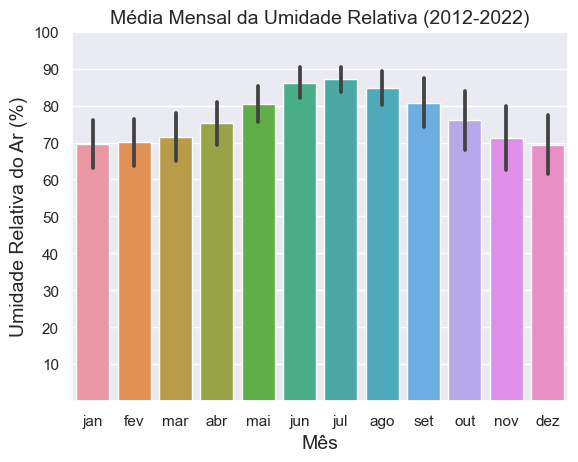

In [71]:
sns.barplot(data=turno_df,x='mes',y='ur_ar_horaria')
plt.title('Média Mensal da Umidade Relativa (2012-2022)', size=14);
plt.ylabel('Umidade Relativa do Ar (%)', size=14)
plt.xlabel('Mês', size=14)

plt.yticks(np.arange(10, 101, 10));

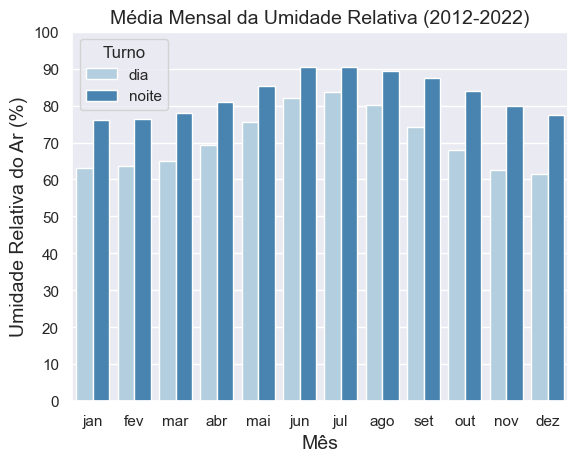

In [72]:
sns.barplot(x='mes',y='ur_ar_horaria',hue='turno',data=turno_df,palette='Blues')

plt.title('Média Mensal da Umidade Relativa (2012-2022)', size=14);
plt.ylabel('Umidade Relativa do Ar (%)', size=14)
plt.yticks(np.arange(0, 101, 10))
plt.xlabel('Mês', size=14)
plt.legend(title='Turno');

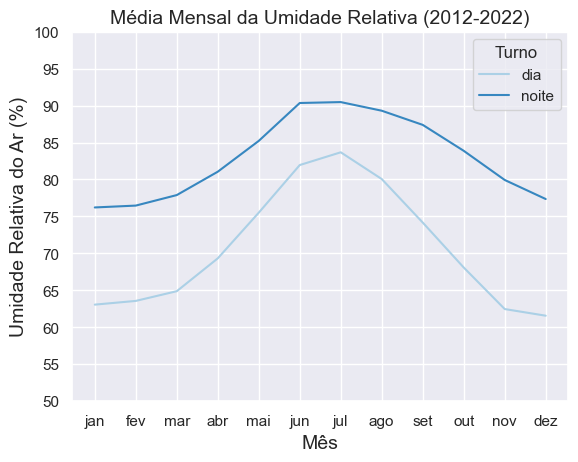

In [73]:
sns.lineplot(x="mes", y="ur_ar_horaria",
             hue="turno",
             data=turno_df,palette='Blues')

plt.title('Média Mensal da Umidade Relativa (2012-2022)', size=14);
plt.ylabel('Umidade Relativa do Ar (%)', size=14)
plt.xlabel('Mês', size=14)
plt.legend(title='Turno')

plt.yticks(np.arange(50, 101, 5));

## Ajuste da Temperatura por ano e mês 

In [74]:
turno = pd.DataFrame()
turno = df.groupby(['mes','turno'])['temp_med_ant'].mean()#.unstack() # Média por ano por mês
turno_df = turno.to_frame()

turno_df = turno_df.assign(idx=turno_df.index)
turno_df = turno_df.reset_index()#(['jan', 'fev', 'mar', 'abr', 'mai', 'jun', 'jul', 'ago', 'set', 'out', 'nov', 'dez'])
turno_df['mes_'] = turno_df['mes'].replace(meses_inv)
turno_df = turno_df.sort_values(by='mes_')
turno_df['turno_'] = turno_df['turno'].replace({'dia':1,'noite':2})


## Gráficos

In [75]:
df.columns

Index(['data', 'hora', 'p_atm_estacao', 'temp_po', 'temp_max_ant',
       'temp_min_ant', 'temp_po_max_ant', 'temp_po_min_ant', 'ur_max_ant',
       'ur_min_ant', 'ur_ar_horaria', 'ano', 'mes', 'turno', 'temp_med_ant'],
      dtype='object')

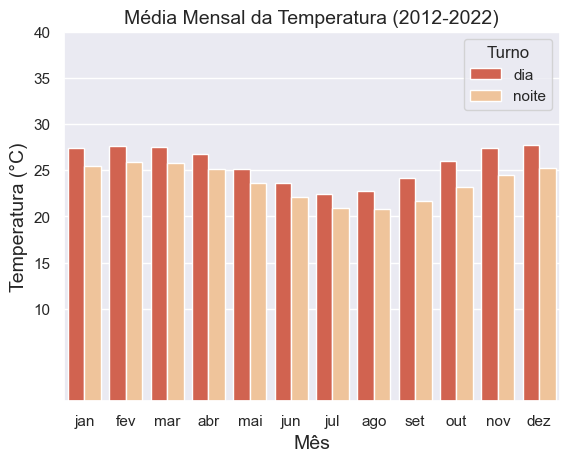

In [76]:
#sns.set_theme()

sns.barplot(x='mes',y='temp_med_ant',hue='turno',data=turno_df,palette='OrRd_r')

plt.title('Média Mensal da Temperatura (2012-2022)', size=14);
plt.ylabel('Temperatura (°C)', size=14)
plt.xlabel('Mês', size=14)
plt.legend(title='Turno')

plt.yticks(np.arange(10, 41, 5));

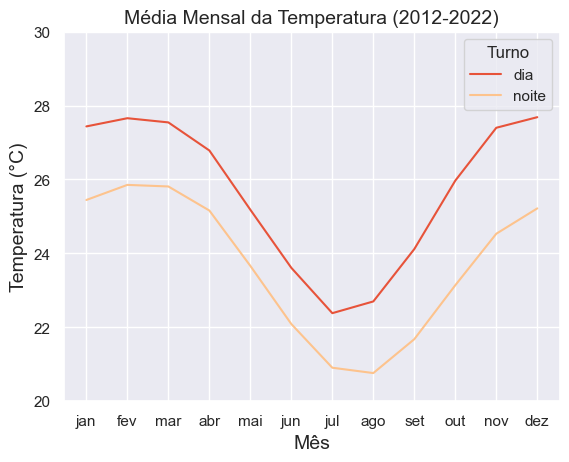

In [77]:
sns.lineplot(x="mes", y="temp_med_ant",
             hue="turno",
             data=turno_df,palette='OrRd_r')

plt.title('Média Mensal da Temperatura (2012-2022)', size=14);
plt.ylabel('Temperatura (°C)', size=14)
plt.xlabel('Mês', size=14)
plt.legend(title='Turno')

plt.yticks(np.arange(20, 31, 2));

In [78]:
turno = pd.DataFrame()
turno = df.groupby(['mes','turno'])['temp_max_ant'].mean()#.unstack() # Média por ano por mês
turno_df = turno.to_frame()

turno_df = turno_df.assign(idx=turno_df.index)
turno_df = turno_df.reset_index()#(['jan', 'fev', 'mar', 'abr', 'mai', 'jun', 'jul', 'ago', 'set', 'out', 'nov', 'dez'])
turno_df['mes_'] = turno_df['mes'].replace(meses_inv)
turno_df = turno_df.sort_values(by='mes_')
turno_df['turno_'] = turno_df['turno'].replace({'dia':1,'noite':2})


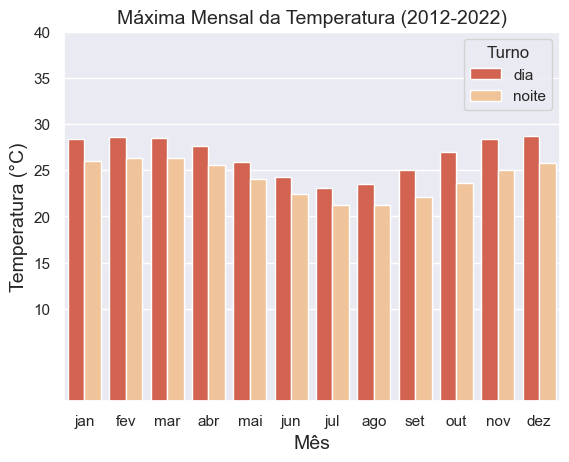

In [79]:
sns.set_theme()

sns.barplot(x='mes',y='temp_max_ant',hue='turno',data=turno_df,palette='OrRd_r')

plt.title('Máxima Mensal da Temperatura (2012-2022)', size=14);
plt.ylabel('Temperatura (°C)', size=14)
plt.xlabel('Mês', size=14)
plt.legend(title='Turno')

plt.yticks(np.arange(10, 41, 5));

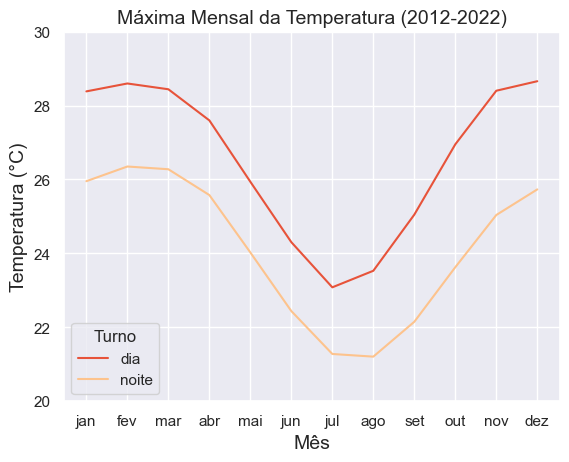

In [80]:
sns.lineplot(x="mes", y="temp_max_ant",
             hue="turno",
             data=turno_df,palette='OrRd_r')

plt.title('Máxima Mensal da Temperatura (2012-2022)', size=14);
plt.ylabel('Temperatura (°C)', size=14)
plt.xlabel('Mês', size=14)
plt.legend(title='Turno')

plt.yticks(np.arange(20, 31, 2));

In [81]:
turno = pd.DataFrame()
turno = df.groupby(['mes','turno'])['temp_min_ant'].mean()#.unstack() # Média por ano por mês
turno_df = turno.to_frame()

turno_df = turno_df.assign(idx=turno_df.index)
turno_df = turno_df.reset_index()#(['jan', 'fev', 'mar', 'abr', 'mai', 'jun', 'jul', 'ago', 'set', 'out', 'nov', 'dez'])
turno_df['mes_'] = turno_df['mes'].replace(meses_inv)
turno_df = turno_df.sort_values(by='mes_')
turno_df['turno_'] = turno_df['turno'].replace({'dia':1,'noite':2})

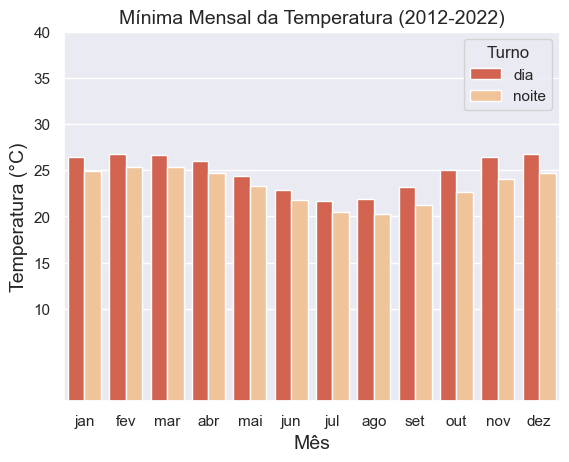

In [82]:
sns.set_theme()

sns.barplot(x='mes',y='temp_min_ant',hue='turno',data=turno_df,palette='OrRd_r')

plt.title('Mínima Mensal da Temperatura (2012-2022)', size=14);
plt.ylabel('Temperatura (°C)', size=14)
plt.xlabel('Mês', size=14)
plt.legend(title='Turno')

plt.yticks(np.arange(10, 41, 5));

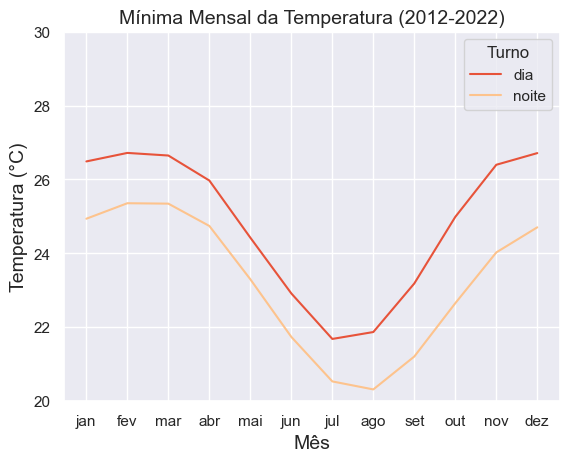

In [83]:
sns.lineplot(x="mes", y="temp_min_ant",
             hue="turno",
             data=turno_df,palette='OrRd_r')

plt.title('Mínima Mensal da Temperatura (2012-2022)', size=14);
plt.ylabel('Temperatura (°C)', size=14)
plt.xlabel('Mês', size=14)
plt.legend(title='Turno')

plt.yticks(np.arange(20, 31, 2));

### Correlação Umidade Relativa x Temperatura 

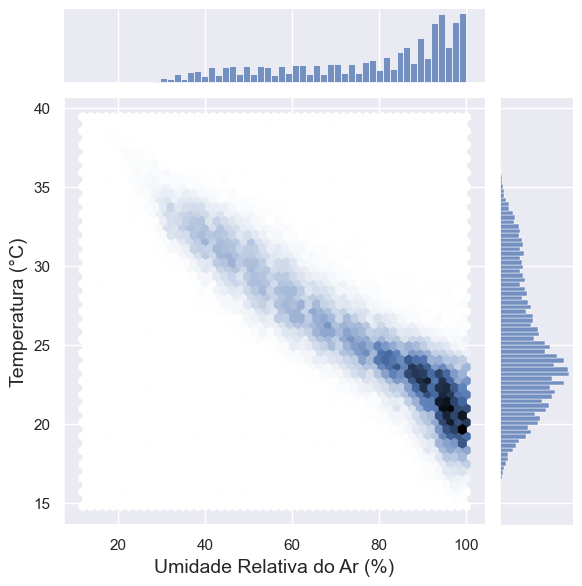

In [84]:
sns.jointplot(y='temp_med_ant',
              x='ur_ar_horaria',
              #hue_order='turno',
              data=df,
              kind='hex',
              dropna=True)
#plt.title('Correlação da Umidade Relativa e Temperatura (2012-2022)', size=14);
plt.ylabel('Temperatura (°C)', size=14)
plt.xlabel('Umidade Relativa do Ar (%)', size=14);

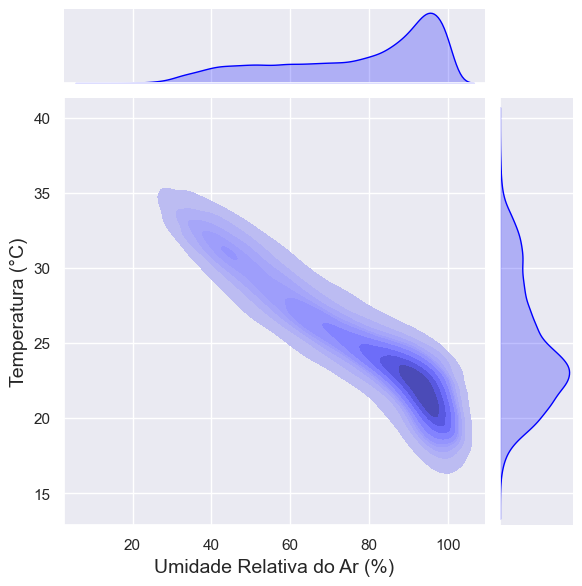

In [85]:
sns.jointplot(y='temp_med_ant',
              x='ur_ar_horaria',
              data=df,
              kind='kde',
              color='Blue',
              fill=True)
plt.ylabel('Temperatura (°C)', size=14)
plt.xlabel('Umidade Relativa do Ar (%)', size=14);